# 1 bit => 0 or 1 => False or True => 표현할수있는 숫자 2개
# 8 bit => 표현할수 있는 숫자 2^8 개 => 256
# uint8 => unsigned int 8 => int를 표시할건데 부호는 없이 8비트를 써서 표현할거야 => 표현가능한 숫자 256개 => 0 ~ 255
# int8 => (signed) int 8 => int를 표시할건데 부호는 있고 8비트를 써서 표현할거야 => 표현가능한 숫자 256개 => -128 ~ 127
# png나 jpg같은 이미지들은 uint8 데이터타입을 사용함

In [1]:
import cv2
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt

image_path = "./cat.jpg"

C:\Users\gr300\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\gr300\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\gr300\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


# PIL.Image 를 사용해서 이미지 읽기
# 137 => 128 + 8 + 1 => 2^7 + 2^3 + 2^0 => 10001001

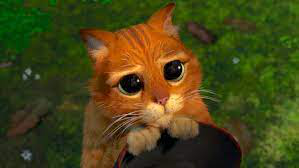

In [2]:
image_obj = Image.open(image_path)
image_obj

In [5]:
type(image_obj)

PIL.JpegImagePlugin.JpegImageFile

(168, 299, 3)
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 

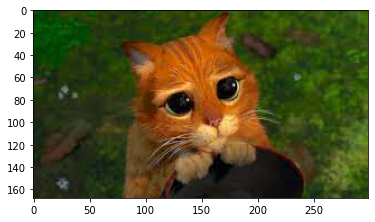

In [13]:
image_array = np.array(image_obj)
print(image_array.shape)
print(np.unique(image_array))
print(image_array.dtype)
plt.imshow(image_array)
plt.show()

(168, 299, 3)


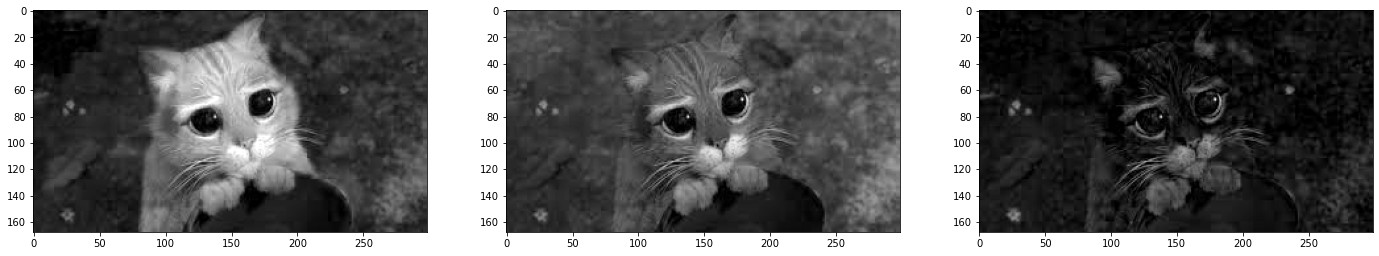

In [8]:
print(image_array.shape)
_, ax = plt.subplots(1, 3, figsize=(24, 8))
for idx in range(3):
    ax[idx].imshow(image_array[..., idx], cmap="gray")
plt.show()

# cv2를 사용해서 이미지 읽기

(168, 299, 3)


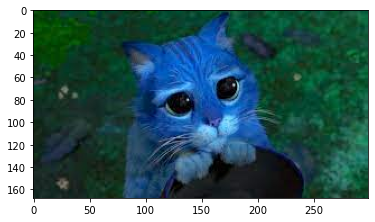

In [16]:
import cv2

image_array = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
print(image_array.shape)
plt.imshow(image_array)
plt.show()

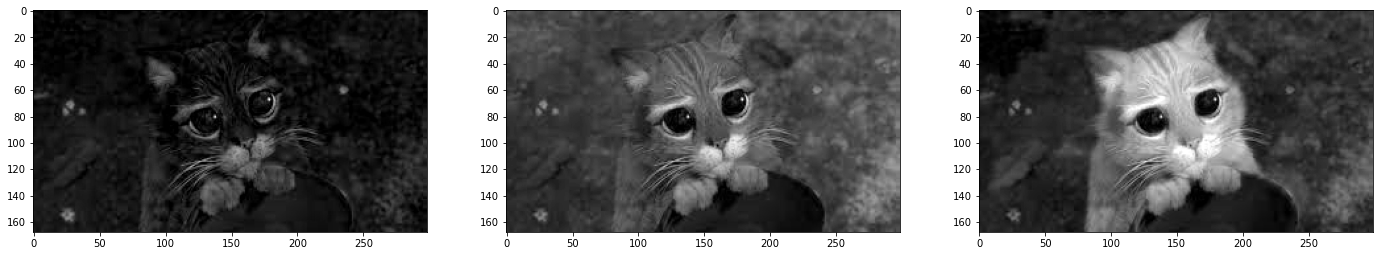

In [17]:
_, ax = plt.subplots(1, 3, figsize=(24, 8))
for idx in range(3):
    ax[idx].imshow(image_array[..., idx], cmap="gray")
plt.show()

# Method 1. Correct BGR to RGB 

(168, 299, 3)


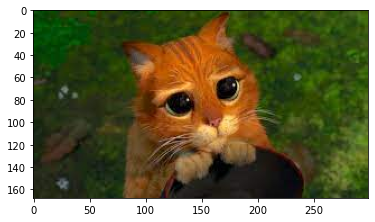

In [19]:
image_array = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
image_array = cv2.cvtColor(image_array, cv2.COLOR_BGR2RGB)
print(image_array.shape)
plt.imshow(image_array)
plt.show()

# Method 2. Use numpy?

(168, 299, 3)


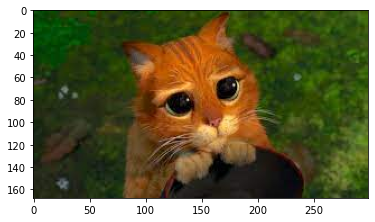

In [32]:
image_array = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
image_array = image_array[:, :, [2, 1, 0]]
print(image_array.shape)
plt.imshow(image_array)
plt.show()

In [19]:
np.array([1, 2, 3])[[2, 1, 0]]

array([3, 2, 1])

In [18]:
[idx * 2 for idx in range(10)]

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18]

# Filp Array

(168, 299, 3)


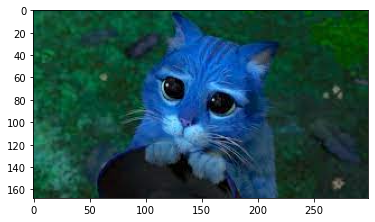

In [20]:
# Horizontal Flip
image_array = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
image_array = image_array[:, ::-1, :]
print(image_array.shape)
plt.imshow(image_array)
plt.show()

(168, 299, 3)


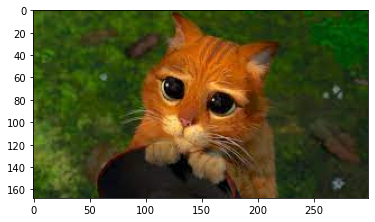

In [34]:
# Horizontal Flip, Change BGR to RGB
image_array = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
image_array = image_array[:, slice(None, None, -1), [2, 1, 0]]
print(image_array.shape)
plt.imshow(image_array)
plt.show()

(168, 299, 3)


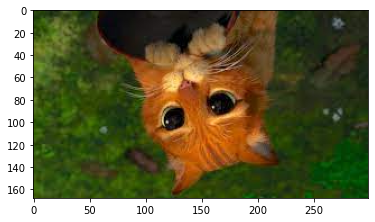

In [37]:
# vertical Flip, Horizontal Flip

image_array = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
image_array = image_array[slice(None, None, -1), slice(None, None, -1), [2, 1, 0]]
print(image_array.shape)
plt.imshow(image_array)
plt.show()

# Resize Array

(512, 512, 3)


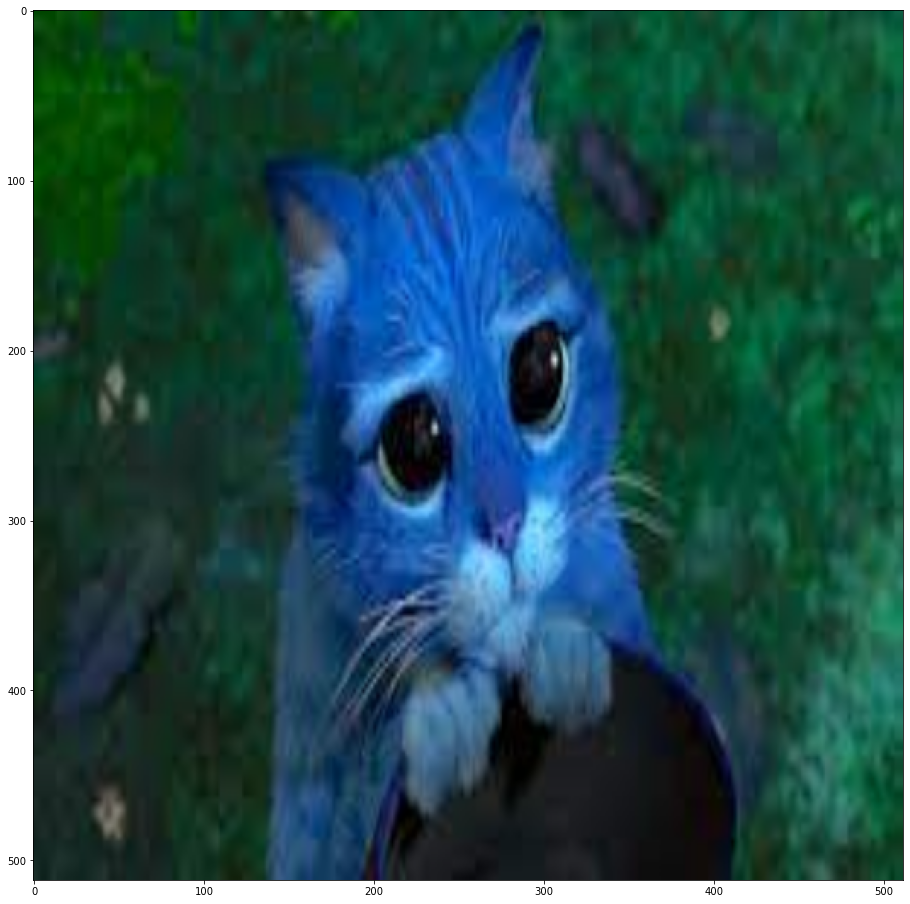

In [33]:
image_array = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
image_array = cv2.resize(image_array, (512, 512), cv2.INTER_LINEAR)
print(image_array.shape)
plt.figure(figsize=(16, 16))
plt.imshow(image_array)
plt.show()